In [1]:
# import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import missingno as msno
import math as mt
import statsmodels.api as sm
from scipy import stats
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold,cross_val_score
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('Tenrec/Tenrec/cold_data.csv', low_memory = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343305 entries, 0 to 343304
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          343305 non-null  int64  
 1   item_id          343305 non-null  int64  
 2   click            343305 non-null  float64
 3   gender           343305 non-null  int64  
 4   age              343305 non-null  int64  
 5   click_count      343305 non-null  int64  
 6   like_count       343305 non-null  int64  
 7   comment_count    343305 non-null  int64  
 8   read_percentage  343305 non-null  float64
 9   item_score1      343305 non-null  int64  
 10  item_score2      343305 non-null  float64
 11  category_second  343305 non-null  int64  
 12  category_first   343305 non-null  int64  
 13  item_score3      343305 non-null  float64
 14  read             343305 non-null  bool   
 15  read_time        343305 non-null  float64
 16  share            343305 non-null  bool

In [3]:
data['user_id'] = data['user_id'].astype('category')
data['item_id'] = data['item_id'].astype('category')
data['gender'] = data['gender'].astype('category')
data['age'] = data['age'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343305 entries, 0 to 343304
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   user_id          343305 non-null  category
 1   item_id          343305 non-null  category
 2   click            343305 non-null  float64 
 3   gender           343305 non-null  category
 4   age              343305 non-null  category
 5   click_count      343305 non-null  int64   
 6   like_count       343305 non-null  int64   
 7   comment_count    343305 non-null  int64   
 8   read_percentage  343305 non-null  float64 
 9   item_score1      343305 non-null  int64   
 10  item_score2      343305 non-null  float64 
 11  category_second  343305 non-null  int64   
 12  category_first   343305 non-null  int64   
 13  item_score3      343305 non-null  float64 
 14  read             343305 non-null  bool    
 15  read_time        343305 non-null  float64 
 16  share            343

In [4]:
data.isna().sum()

user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

There is no NA data

In [5]:
# Basic statistics of numerical features
print(data.describe(include='all'))

         user_id   item_id     click    gender       age   click_count  \
count   343305.0  343305.0  343305.0  343305.0  343305.0  3.433050e+05   
unique   68661.0   55746.0       NaN       3.0       8.0           NaN   
top         11.0    8535.0       NaN       1.0       2.0           NaN   
freq         5.0    1453.0       NaN  230225.0  163890.0           NaN   
mean         NaN       NaN       1.0       NaN       NaN  1.603245e+05   
std          NaN       NaN       0.0       NaN       NaN  3.430599e+05   
min          NaN       NaN       1.0       NaN       NaN  0.000000e+00   
25%          NaN       NaN       1.0       NaN       NaN  1.777800e+04   
50%          NaN       NaN       1.0       NaN       NaN  5.865000e+04   
75%          NaN       NaN       1.0       NaN       NaN  1.600580e+05   
max          NaN       NaN       1.0       NaN       NaN  6.824316e+06   

           like_count  comment_count  read_percentage    item_score1  \
count   343305.000000  343305.000000   

In [6]:
data.head()
data.tail()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,True,88.0,False,False,False,False
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,True,134.0,False,False,False,False


,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
343300,786430,152946,1.0,2,2,5705,156,21,68.0,3,3.0,10901,109,1.0,True,58.0,False,False,False,False
343301,786430,36745,1.0,2,2,5323,14,68,46.0,2,3.0,12005,120,1.0,True,67.0,False,False,False,False
343302,786430,180675,1.0,2,2,8339,404,28,59.0,3,3.0,13201,132,3.0,True,94.0,False,False,False,False
343303,786430,197627,1.0,2,2,2606,143,47,2.0,4,3.0,13101,131,5.0,True,54.0,False,False,False,False
343304,786430,195413,1.0,2,2,198080,2378,3042,56.0,4,6.0,12000,120,3.0,True,108.0,False,False,False,False


array([[<AxesSubplot: title={'center': 'click'}>,
        <AxesSubplot: title={'center': 'click_count'}>,
        <AxesSubplot: title={'center': 'like_count'}>],
       [<AxesSubplot: title={'center': 'comment_count'}>,
        <AxesSubplot: title={'center': 'read_percentage'}>,
        <AxesSubplot: title={'center': 'item_score1'}>],
       [<AxesSubplot: title={'center': 'item_score2'}>,
        <AxesSubplot: title={'center': 'category_second'}>,
        <AxesSubplot: title={'center': 'category_first'}>],
       [<AxesSubplot: title={'center': 'item_score3'}>,
        <AxesSubplot: title={'center': 'read_time'}>, <AxesSubplot: >]],
      dtype=object)

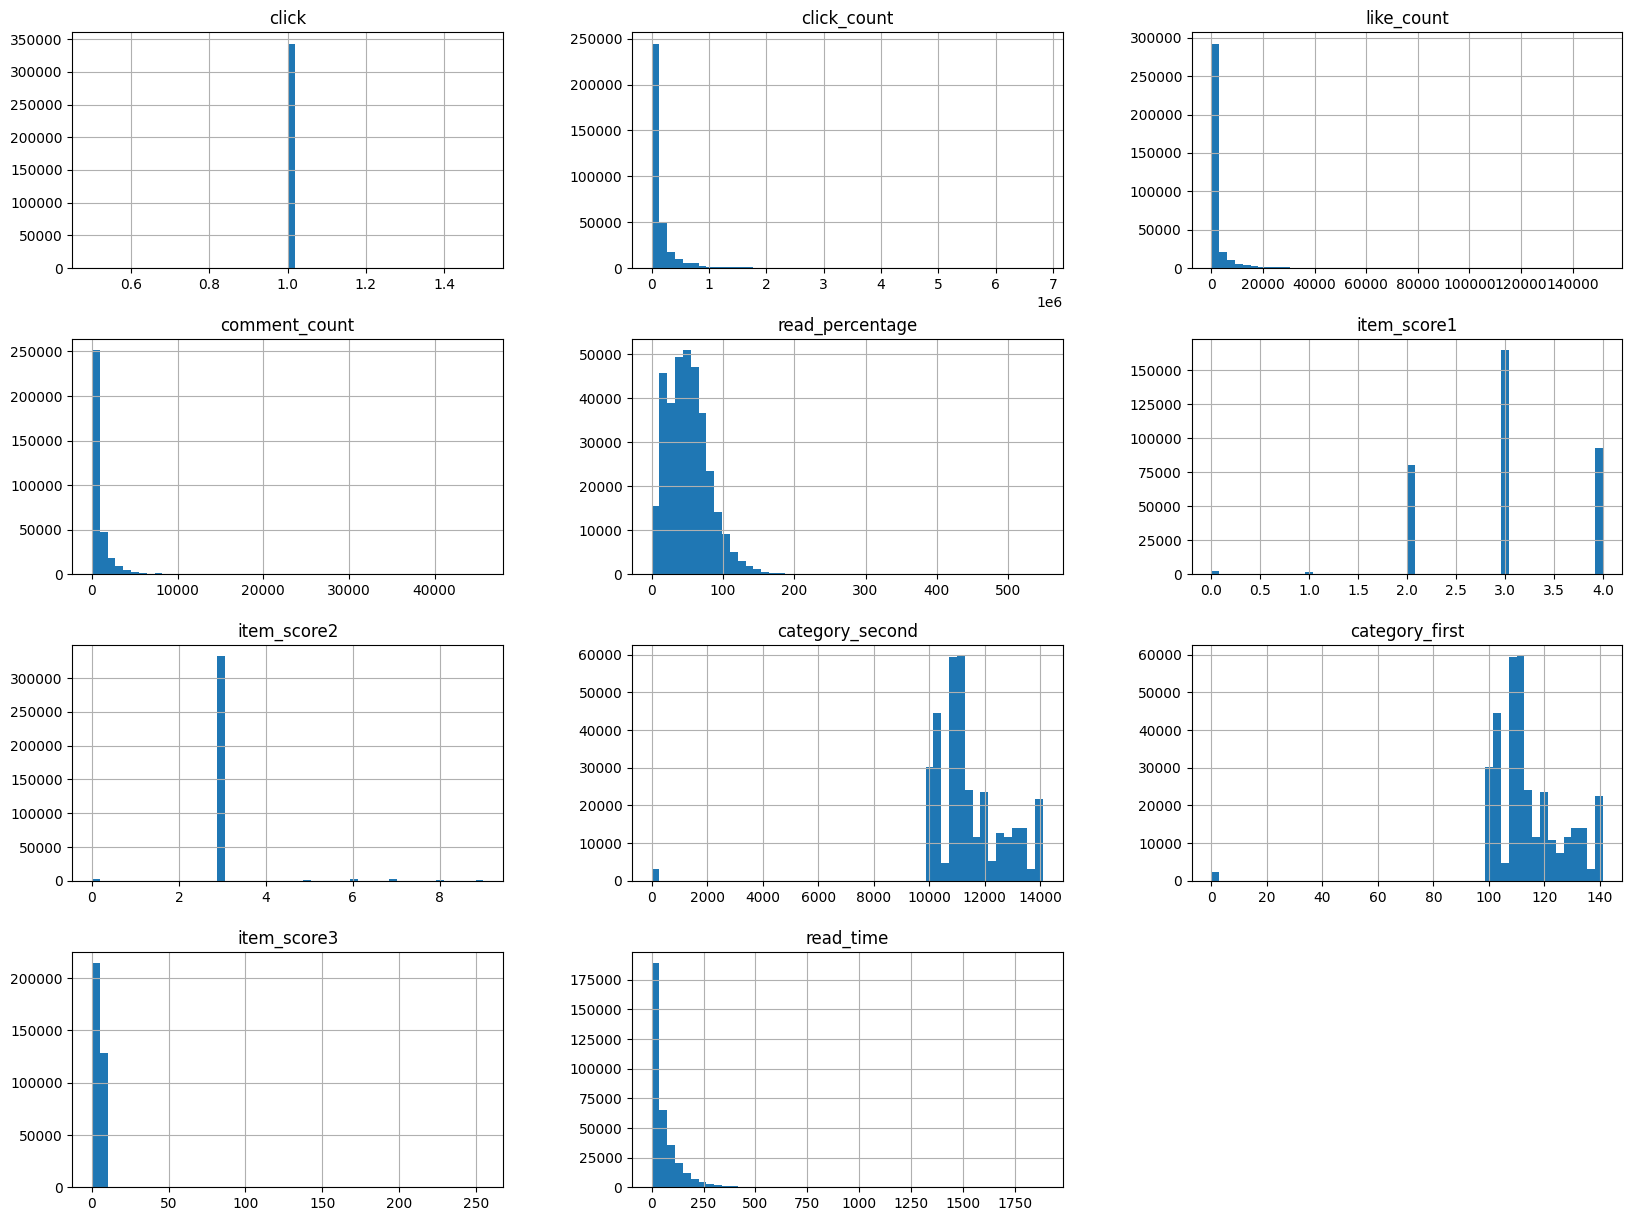

In [7]:
# Plot histograms of numerical features
data.hist(bins=50, figsize=(20, 15))
plt.show()

C:\Users\lyc14\AppData\Local\Temp\ipykernel_40360\2958313627.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<AxesSubplot: >

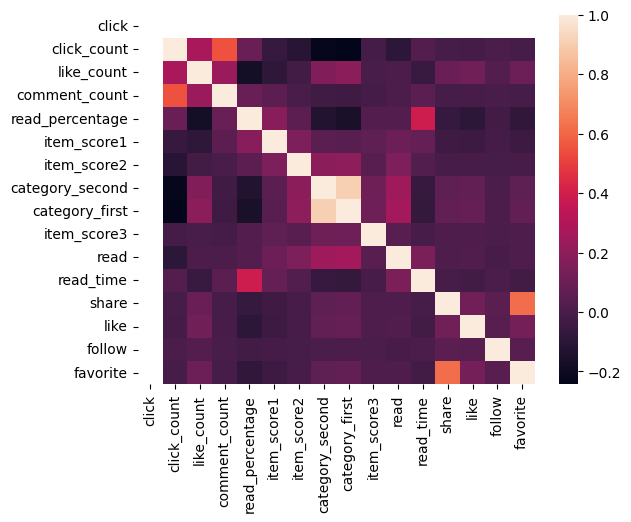

In [8]:
# Plot correlation matrix of numerical features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

<AxesSubplot: xlabel='gender', ylabel='count'>

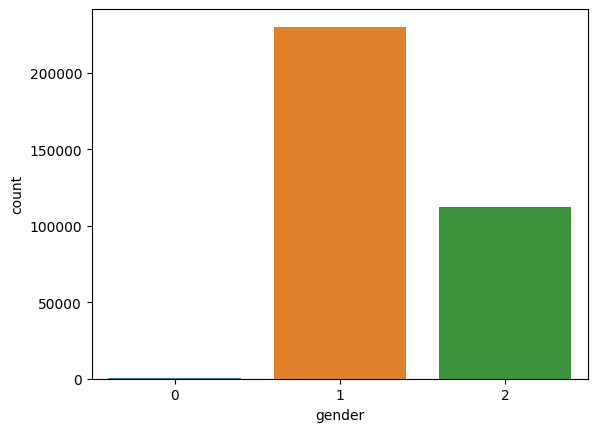

<AxesSubplot: xlabel='age', ylabel='count'>

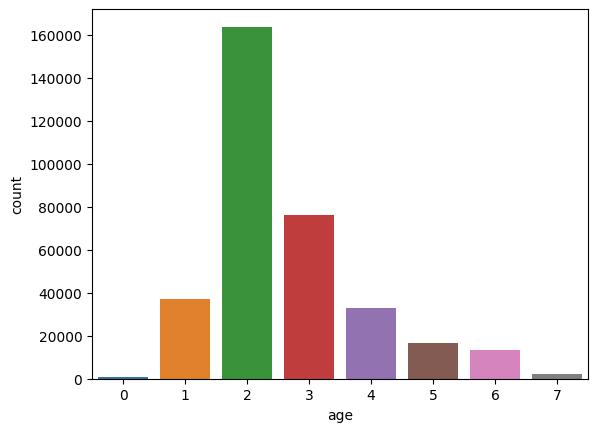

In [9]:
# Plot count plots of categorical features
sns.countplot(x='gender', data=data)
plt.show()
sns.countplot(x='age', data=data)
plt.show()

<AxesSubplot: xlabel='gender'>

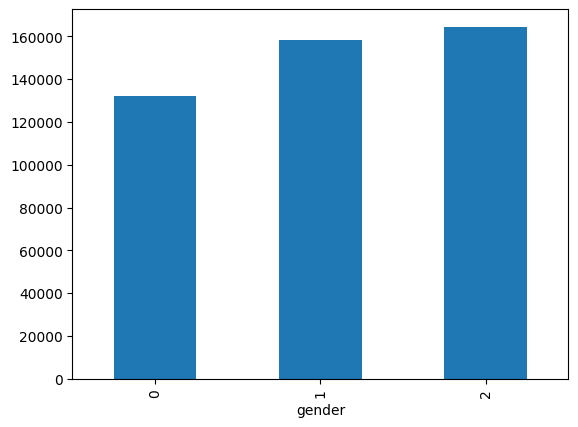

<AxesSubplot: xlabel='age'>

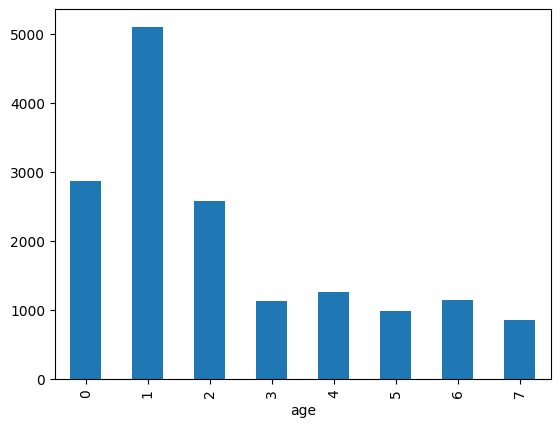

In [10]:
# Plot bar plots of numerical features grouped by categorical features
data.groupby('gender')['click_count'].mean().plot(kind='bar')
plt.show()
data.groupby('age')['like_count'].mean().plot(kind='bar')
plt.show()

<AxesSubplot: xlabel='click_count', ylabel='like_count'>

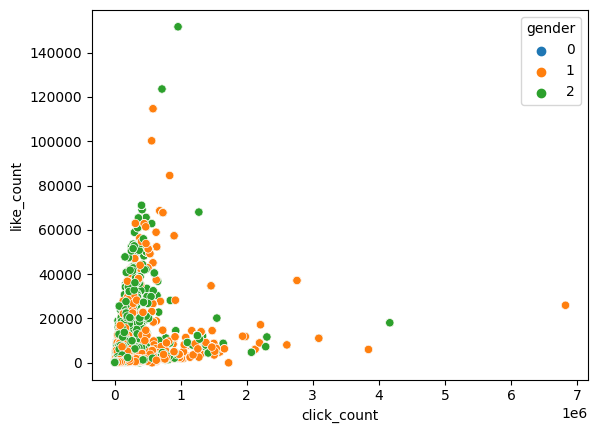

<AxesSubplot: xlabel='click_count', ylabel='comment_count'>

In [ ]:
# Plot scatter plots of pairs of numerical features
sns.scatterplot(x='click_count', y='like_count', data=data, hue = 'gender')
plt.show()
sns.scatterplot(x='click_count', y='comment_count', data=data, hue = 'gender')
plt.show()

In [ ]:
sns.scatterplot(x='like_count', y='comment_count', data=data, hue = 'age')
plt.show()

In [ ]:
sns.scatterplot(x='read_time', y='read_percentage', data=data, hue = 'age')
plt.show()

#### Summary
I choose to do the EDA about the data set in file "cold_data.csv". As it was mainly used in the paper.
I took a look at the basic information and the head and tail of the data. There does not exist Na values. 
I made a correlation analysis and found several strongly correlated factors: read_time & read_percentage, click_count & like_count, etc.